In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")

In [2]:
#data import
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [4]:
df['smoking_history'].values

array(['never', 'No Info', 'never', ..., 'former', 'never', 'current'],
      dtype=object)

In [5]:
# Descriptive statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
#missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
#duplicates
print(df.duplicated().sum())
#drop data duplicated
df = df.drop_duplicates()
print("___Dropped Duplicates___")
print('Duplicate Value counts :',df.duplicated().sum())

3854
___Dropped Duplicates___
Duplicate Value counts : 0


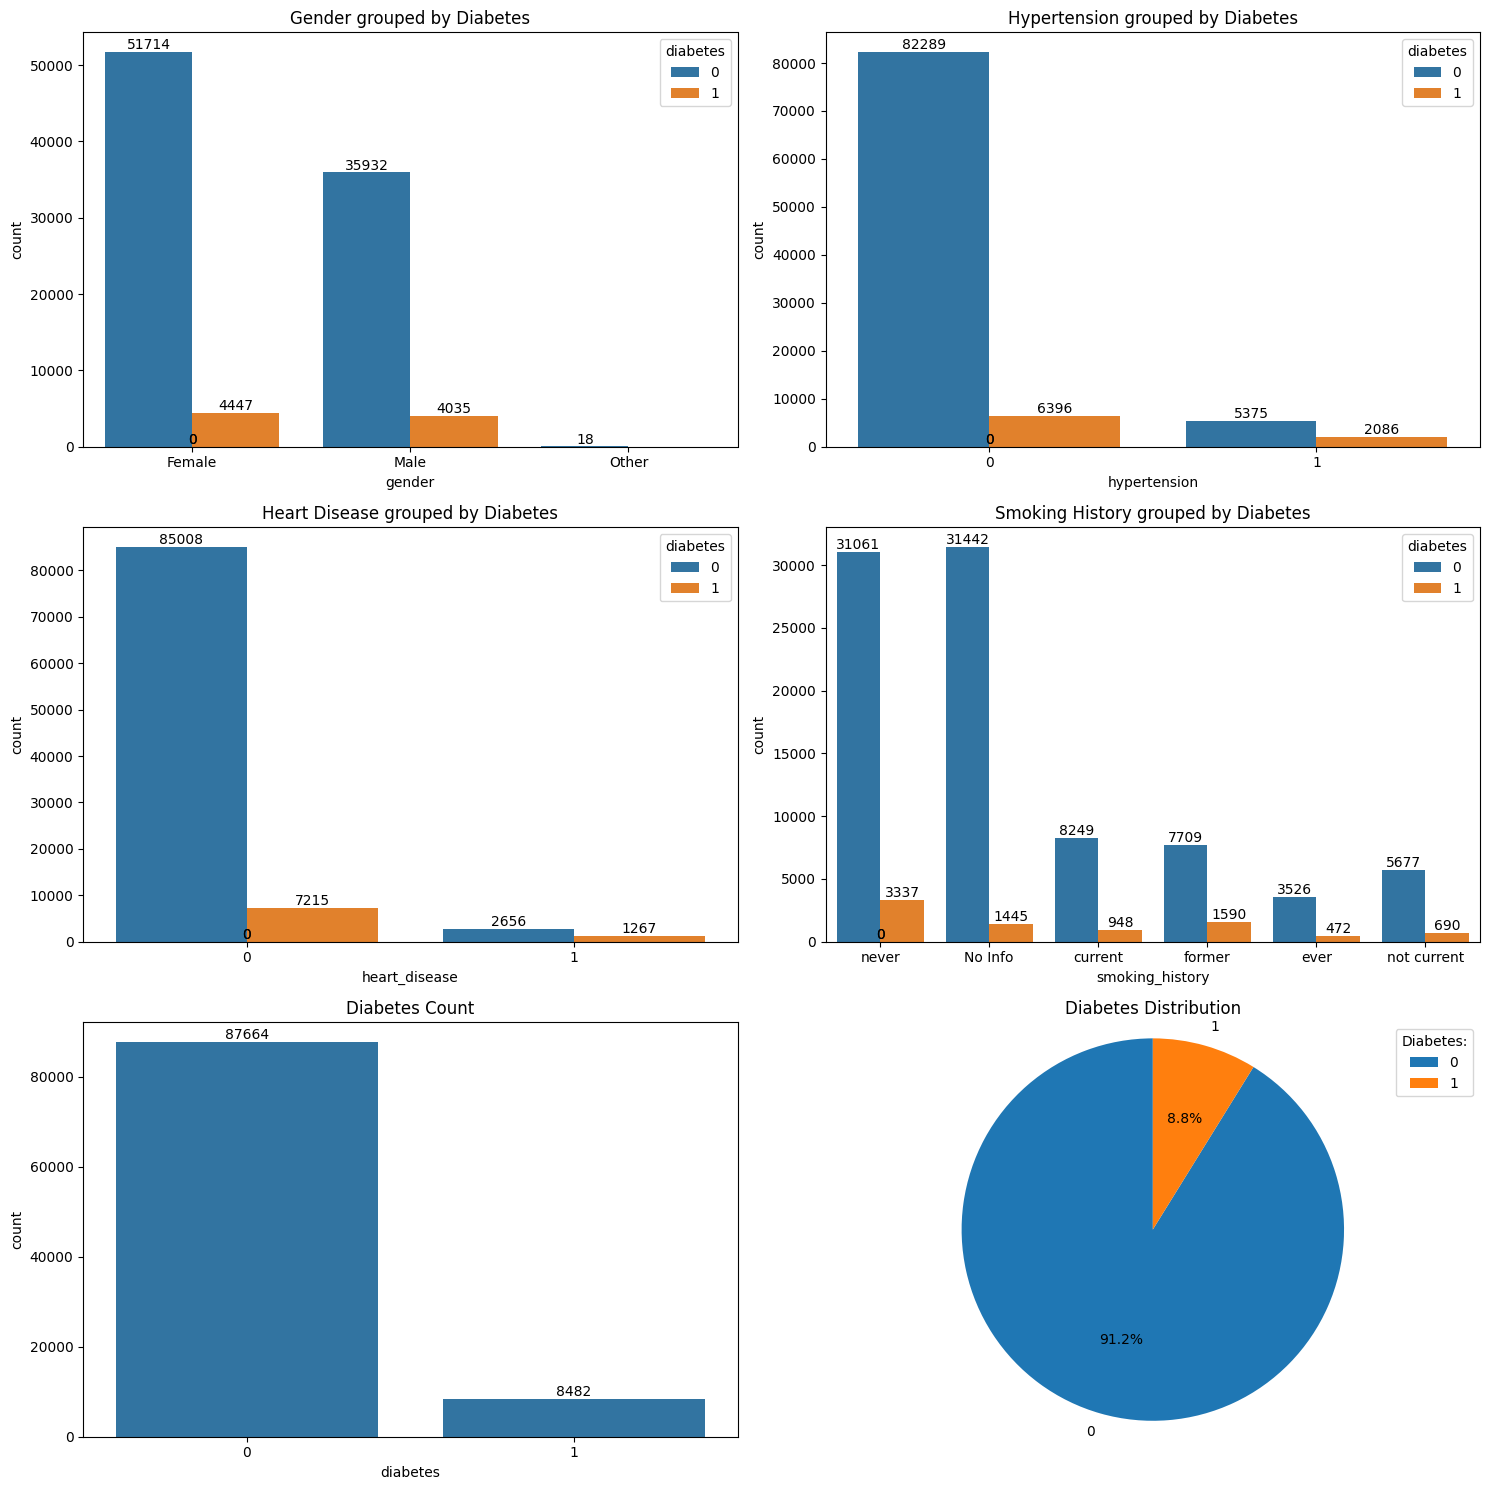

In [9]:
#count plots
def count_plots(ax): 
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
count_plots(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
count_plots(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
count_plots(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
count_plots(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
count_plots(ax)

# Create pie plot for diabetes
diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


Minimum age: 0.08
Maximum age: 80.0
Average age: 41.79432571297817
Diabetes Counts:
diabetes
0    87664
1     8482
Name: count, dtype: int64
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


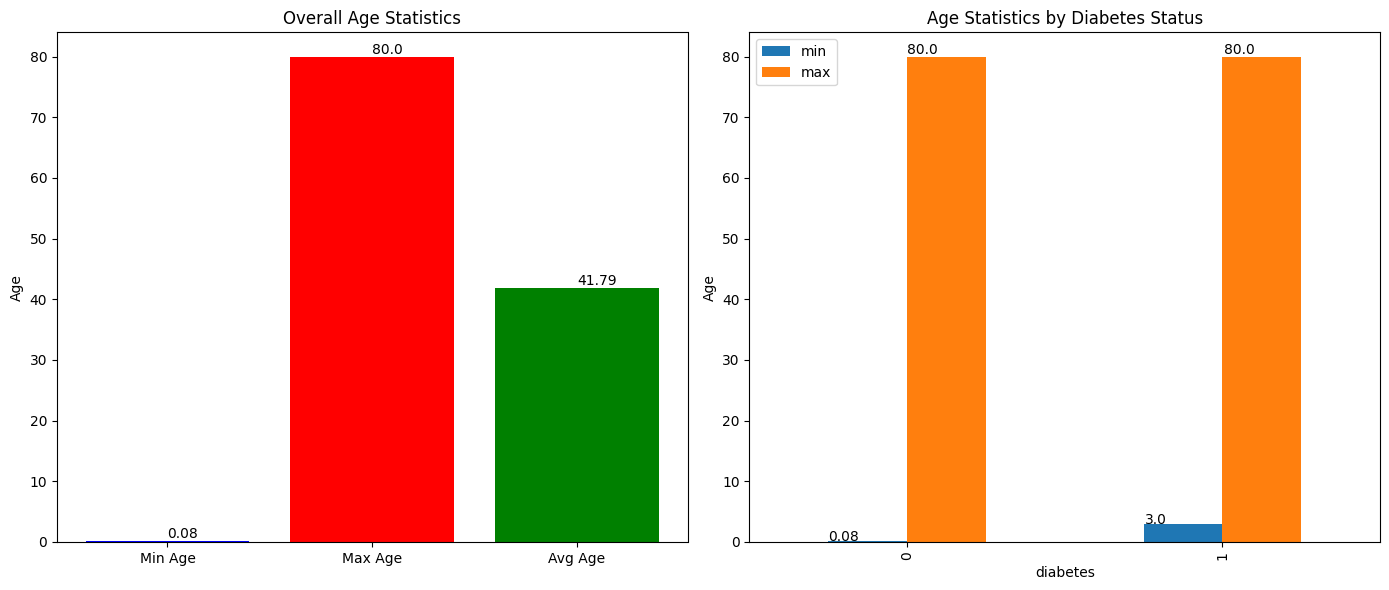

In [10]:
# Calculate minimum, maximum, and average age
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average age
bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Adding text to the top of the bars

# Plot for min and max ages grouped by diabetes status
grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1])
ax[1].set_title('Age Statistics by Diabetes Status')
ax[1].set_ylabel('Age')

# Annotate bars with their values
for p in grouped_bars.patches:
    grouped_bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()

Diabetes and smoking history


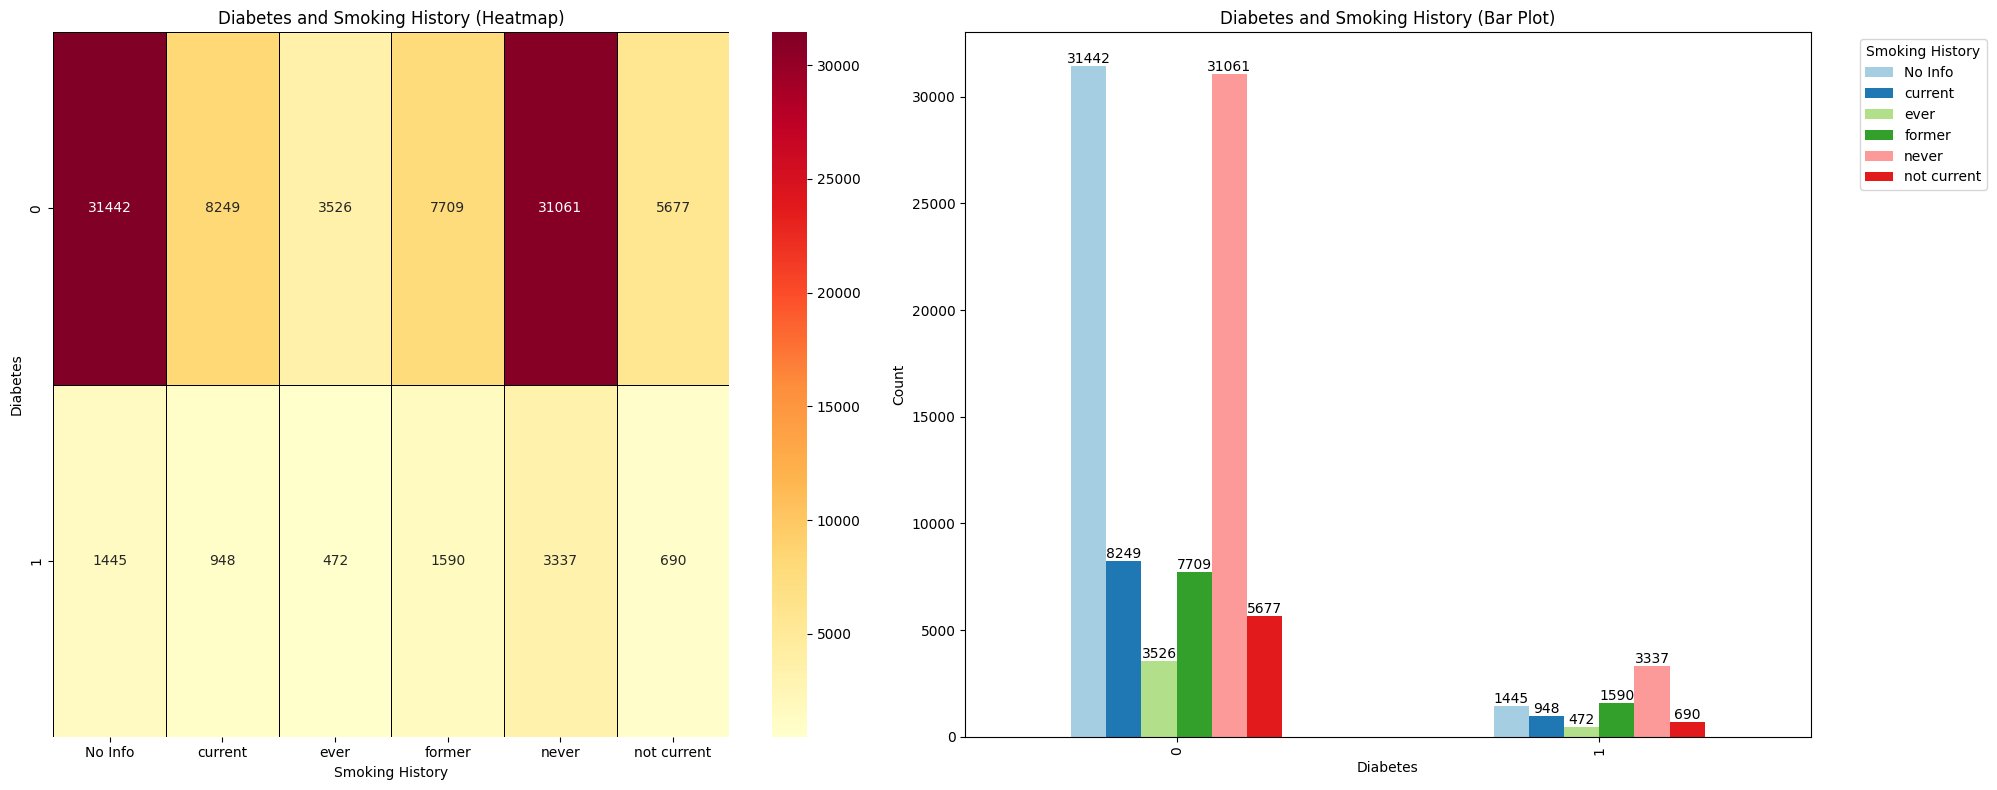

In [11]:
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the cross table as a heatmap
sns.heatmap(cross_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, linecolor='black', ax=ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

# Plotting the cross table with separate bars for smoking history
cross_table.plot(kind='bar', stacked=False, ax=ax[1], color=plt.cm.Paired.colors)
ax[1].set_title('Diabetes and Smoking History (Bar Plot)')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title='Smoking History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with their values
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.tight_layout()
plt.show()

Data encoding


In [12]:
from sklearn.preprocessing import LabelEncoder
import pickle
le = LabelEncoder()
gender_le = LabelEncoder()
smoking_history_le = LabelEncoder()
hypertension_le = LabelEncoder()
heart_disease_le = LabelEncoder()

# Fit and transform 
df['gender'] = gender_le.fit_transform(df['gender'])
df['smoking_history'] = smoking_history_le.fit_transform(df['smoking_history'])
df['diabetes'] = hypertension_le.fit_transform(df['diabetes'])
df['heart_disease'] = heart_disease_le.fit_transform(df['heart_disease'])


# Saving each encoder 
with open("gender_encoder.pkl", 'wb') as file:
    pickle.dump(gender_le, file)
with open("smoking_history_encoder.pkl", 'wb') as file:
    pickle.dump(smoking_history_le, file)
with open("diabetes_encoder.pkl", 'wb') as file:
    pickle.dump(hypertension_le, file)
with open("heart_disease_encoder.pkl", 'wb') as file:
    pickle.dump(heart_disease_le, file)

Performing Principal component Analysis

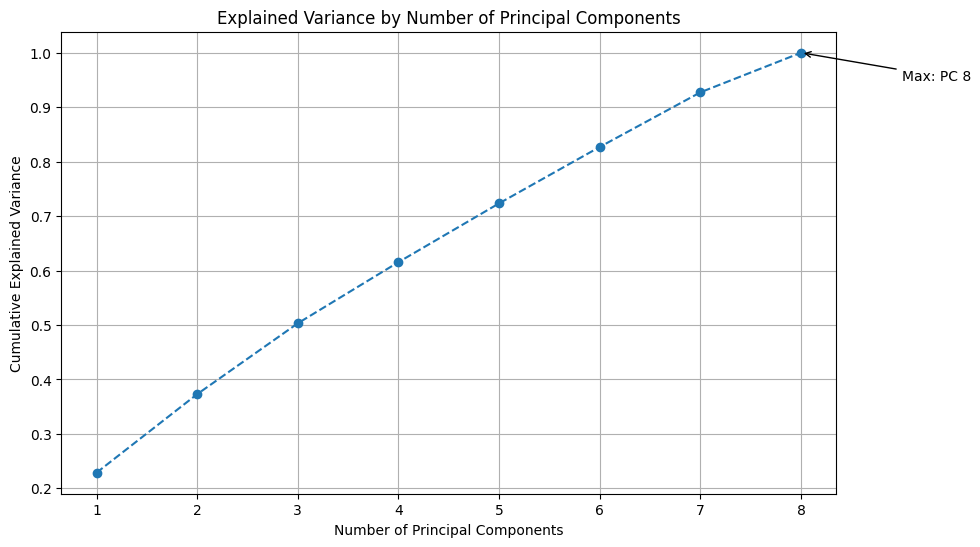

Principal Component 1: 0.2287 cumulative explained variance
Principal Component 2: 0.3729 cumulative explained variance
Principal Component 3: 0.5031 cumulative explained variance
Principal Component 4: 0.6154 cumulative explained variance
Principal Component 5: 0.7234 cumulative explained variance
Principal Component 6: 0.8270 cumulative explained variance
Principal Component 7: 0.9273 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [13]:
# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 
            'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choosing the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Modelling for Diabetes Prediction

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initializing and training the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')


XGBoost Accuracy: 0.9661
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.93      0.67      0.78      1721

    accuracy                           0.97     19230
   macro avg       0.95      0.83      0.88     19230
weighted avg       0.97      0.97      0.96     19230



Confusion matrix

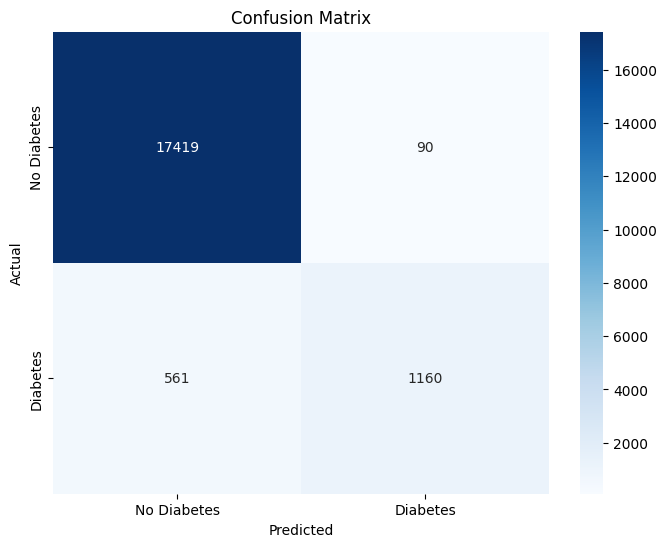

In [15]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
import pickle

# Save the model
with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [17]:
# Prepare custom data
custom_data = [
    [1, 45, 0, 0, 1, 25.6, 6.5, 110],
    [0, 35, 1, 0, 0, 28.2, 7.2, 130],
    [1, 55, 1, 1, 1, 31.4, 8.0, 150],
    [0, 42, 0, 1, 0, 26.9, 7.0, 120],
    [1, 50, 1, 0, 1, 29.7, 7.8, 140]
]

# Convert to pandas DataFrame
custom_df = pd.DataFrame(custom_data, columns=features)

# Standardize the custom data
custom_X = scaler.transform(custom_df[features])

# Apply PCA transformation
custom_X_pca = pca.transform(custom_X)

# Make predictions using the trained XGBoost model
custom_predictions = xgb_model.predict(custom_X_pca)

# Print the predictions
for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Person {i+1} is not predicted to have diabetes.")
    else:
        print(f"Person {i+1} is predicted to have diabetes.")

Person 1 is not predicted to have diabetes.
Person 2 is predicted to have diabetes.
Person 3 is predicted to have diabetes.
Person 4 is not predicted to have diabetes.
Person 5 is predicted to have diabetes.


Modelling for Hypertension Prediction

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Instantiate the classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 3: Train the model
xgb_clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_clf.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.97


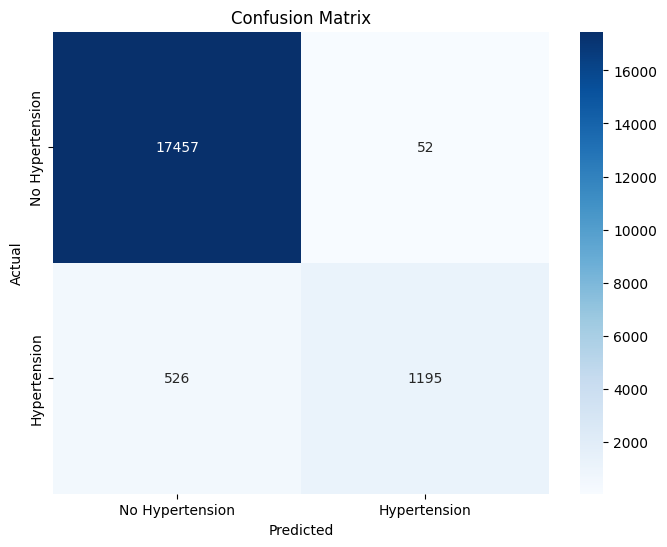

In [19]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hypertension', 'Hypertension'], yticklabels=['No Hypertension', 'Hypertension'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
df['smoking_history'].value_counts()

smoking_history
4    34398
0    32887
3     9299
1     9197
5     6367
2     3998
Name: count, dtype: int64

In [21]:
import pickle

# Save the model
with open('hypertension_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [23]:
features = ['gender', 'age', 'diabetes', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
customs_data = [
    [1, 55, 1, 1, 1, 32.0, 7.2, 160],
    [0, 35, 1, 0, 0, 28.2, 7.2, 130],
    [1, 55, 1, 1, 1, 31.4, 8.0, 150],
    [0, 42, 1, 1, 0, 26.9, 7.0, 120],
    [1, 50, 1, 0, 1, 29.7, 7.8, 140]
]

In [24]:
custom_df = pd.DataFrame(customs_data, columns=features)
custom_predictions = xgb_model.predict(custom_df)

for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Person {i+1} is not predicted to have hypertension.")
    else:
        print(f"Person {i+1} is predicted to have hypertension.")

Person 1 is predicted to have hypertension.
Person 2 is predicted to have hypertension.
Person 3 is predicted to have hypertension.
Person 4 is predicted to have hypertension.
Person 5 is predicted to have hypertension.


In [ ]:
custom_df.dtypes

In [ ]:
!pip show scikit-learn